<a href="https://colab.research.google.com/github/Swayms-stack/Retail-Chain-Analysis/blob/main/SCM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Install & import necessary libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from prophet import Prophet

In [2]:
# 📊 Clean and filter retail sales data
df = pd.read_csv("Retail_Trade_Sales_by_region_in_current_prices_2011_Q22025_Q1.csv")

# Keep only relevant columns
df = df[['Quarter', 'Region', 'Industry', 'Value']]

# Remove nulls
df = df.dropna(subset=['Value'])

# Filter only 'All retail trade'
df = df[df['Industry'].str.contains("All retail trade")]

# Convert Quarter string to datetime
df['Quarter'] = df['Quarter'].str.replace(' Q1', '-03-31')\
                             .str.replace(' Q2', '-06-30')\
                             .str.replace(' Q3', '-09-30')\
                             .str.replace(' Q4', '-12-31')
df['Quarter'] = pd.to_datetime(df['Quarter'])

# Filter only from 2020 onwards
df = df[df['Quarter'] >= '2020-01-01']

# Aggregate national sales per quarter
sales_df = df.groupby('Quarter')['Value'].sum().reset_index()
sales_df = sales_df.rename(columns={'Quarter': 'ds', 'Value': 'y'})

/tmp/ipython-input-3-957594533.py:9: UserWarning: Glyph 128994 (\N{LARGE GREEN CIRCLE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128994 (\N{LARGE GREEN CIRCLE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


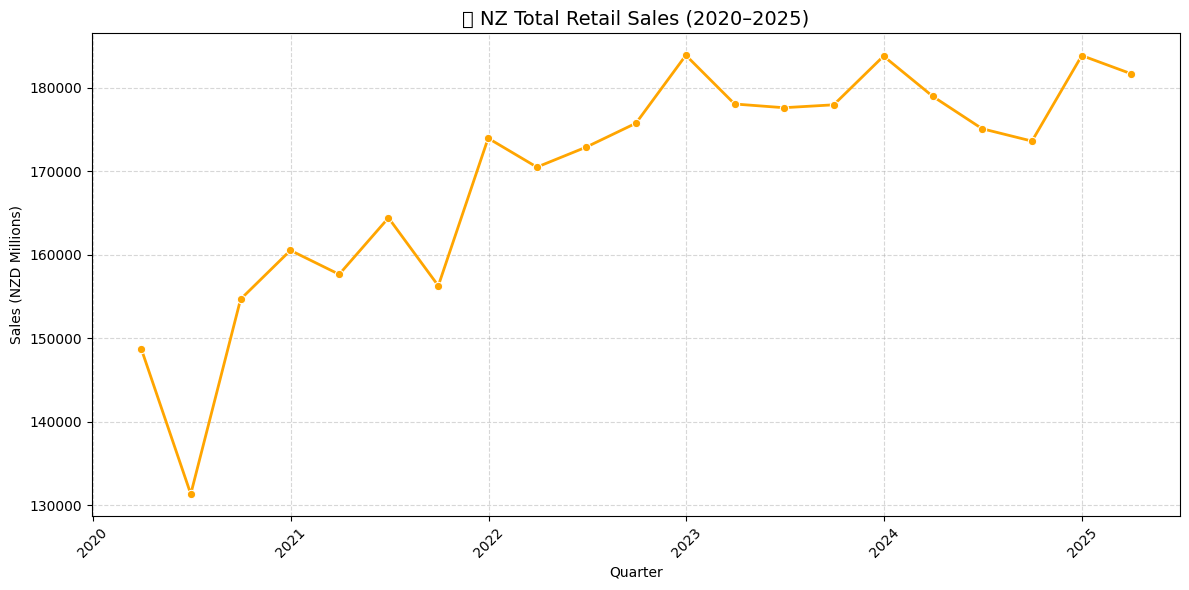

In [3]:
# 📈 EDA - Sales trend with color
plt.figure(figsize=(12, 6))
sns.lineplot(data=sales_df, x='ds', y='y', color='orange', marker='o', linewidth=2)
plt.title("🟢 NZ Total Retail Sales (2020–2025)", fontsize=14)
plt.xlabel("Quarter")
plt.ylabel("Sales (NZD Millions)")
plt.grid(True, linestyle='--', alpha=0.5)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [4]:
# 🔮Forecast sales using Prophet
model = Prophet()
model.fit(sales_df)

# Forecast next 8 quarters (2 years)
future = model.make_future_dataframe(periods=8, freq='Q')
forecast = model.predict(future)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 15.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpg_4ocjyb/jfxrvb8t.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpg_4ocjyb/23c4kzyq.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=23431', 'data', 'file=/tmp/tmpg_4ocjyb/jfxrvb8t.json', 'init=/tmp/tmpg_4ocjyb/23c4kzyq.json', 'output', 'file=/tmp/tmpg_4ocjyb/prophet_modelwlq1i5q3/prophet_model-20250711071530.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
07:15:30 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:15:31 - cmdstanpy - INFO - Chain [1] done processing
INFO:

/tmp/ipython-input-5-2702845490.py:10: UserWarning: Glyph 128308 (\N{LARGE RED CIRCLE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128308 (\N{LARGE RED CIRCLE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


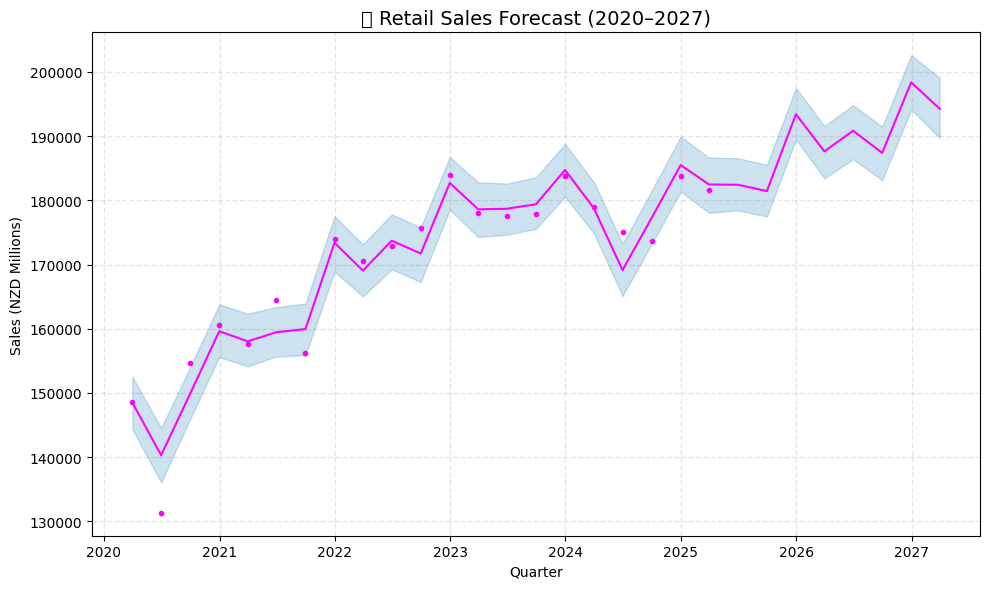

In [5]:
# 📈 Plot forecast
fig = model.plot(forecast)
ax = fig.gca()
for line in ax.get_lines():
    line.set_color("magenta")
plt.title("🔴 Retail Sales Forecast (2020–2027)", fontsize=14)
plt.grid(True, linestyle='--')
plt.xlabel("Quarter")
plt.ylabel("Sales (NZD Millions)")
plt.tight_layout()
plt.show()

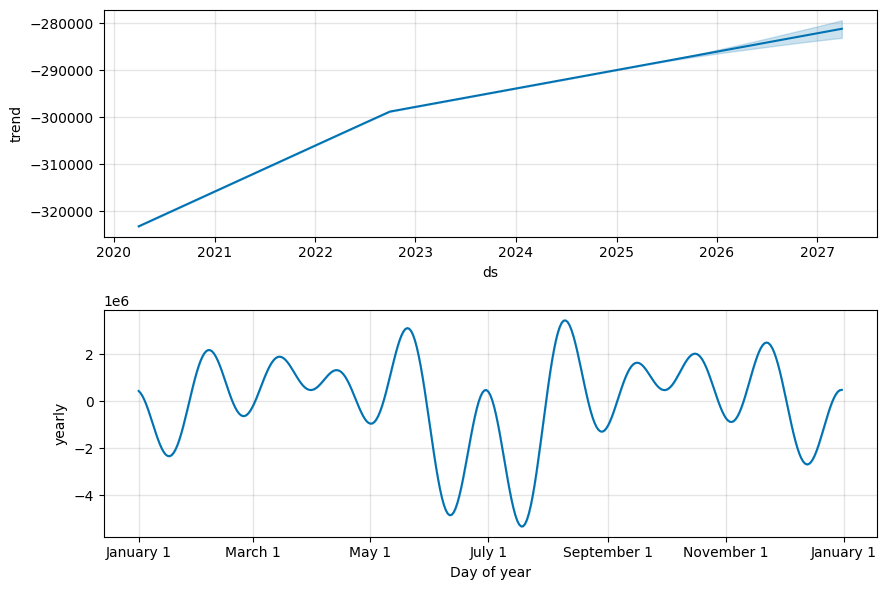

In [6]:
# Optional: Plot forecast components (trend, seasonality)
model.plot_components(forecast)
plt.show()

In [7]:
# ✅ Load the AES file (2023)
aes = pd.read_csv("annual-enterprise-survey-2023-financial-year-provisional.csv")

# 🎯 Filter for "Retail Trade" only
aes_retail = aes[aes['Industry_name_NZSIOC'] == "Retail Trade"]

# 🔎 List available variable names for Retail Trade
print("🔍 Available variables for Retail Trade:")
print(aes_retail['Variable_name'].unique())

🔍 Available variables for Retail Trade:
[]


In [8]:
# Exact column names in the AES file
aes = pd.read_csv("annual-enterprise-survey-2023-financial-year-provisional.csv")
print(aes.columns.tolist())

['Year', 'Industry_aggregation_NZSIOC', 'Industry_code_NZSIOC', 'Industry_name_NZSIOC', 'Units', 'Variable_code', 'Variable_name', 'Variable_category', 'Value', 'Industry_code_ANZSIC06']


In [9]:
aes_retail = aes[aes['Industry_name_NZSIOC'] == "Retail Trade and Accommodation"]
# Show which variables are available for this industry
print("🔍 Available variables for Retail Trade and Accommodation:")
print(aes_retail['Variable_name'].unique())

🔍 Available variables for Retail Trade and Accommodation:
['Total income' 'Sales of goods not further processed'
 'Sales of other goods and services' 'Interest, dividends and donations'
 'Government funding, grants and subsidies' 'Non-operating income'
 'Total expenditure' 'Interest and donations' 'Indirect taxes'
 'Depreciation' 'Salaries and wages paid' 'Redundancy and severance'
 'Purchases of goods bought for resale'
 'Other Purchases and operating expenses' 'Non-operating expenses'
 'Opening stocks' 'Closing stocks' 'Surplus before income tax'
 'Total assets' 'Current assets' 'Fixed tangible assets'
 'Additions to fixed assets' 'Disposals of fixed assets' 'Other assets'
 'Total equity and liabilities' 'Shareholders funds or owners equity'
 'Current liabilities' 'Other liabilities'
 'Total income per employee count' 'Surplus per employee count'
 'Current ratio' 'Quick ratio' 'Margin on sales of goods for resale'
 'Return on equity' 'Return on total assets' 'Liabilities structure'
 

In [10]:
# 📊 Get values from the actual dataset
closing_stocks = aes_retail[aes_retail['Variable_name'] == "Closing stocks"]['Value'].sum()
purchases = aes_retail[aes_retail['Variable_name'] == "Total operating expenditure"]['Value'].sum()

# ✅ Calculate unit cost
unit_cost = closing_stocks / purchases if purchases > 0 else 1.00
print(f"✅ Estimated Unit Cost (NZ Retail + Accommodation 2023): {unit_cost:.4f}")

✅ Estimated Unit Cost (NZ Retail + Accommodation 2023): 1.0000


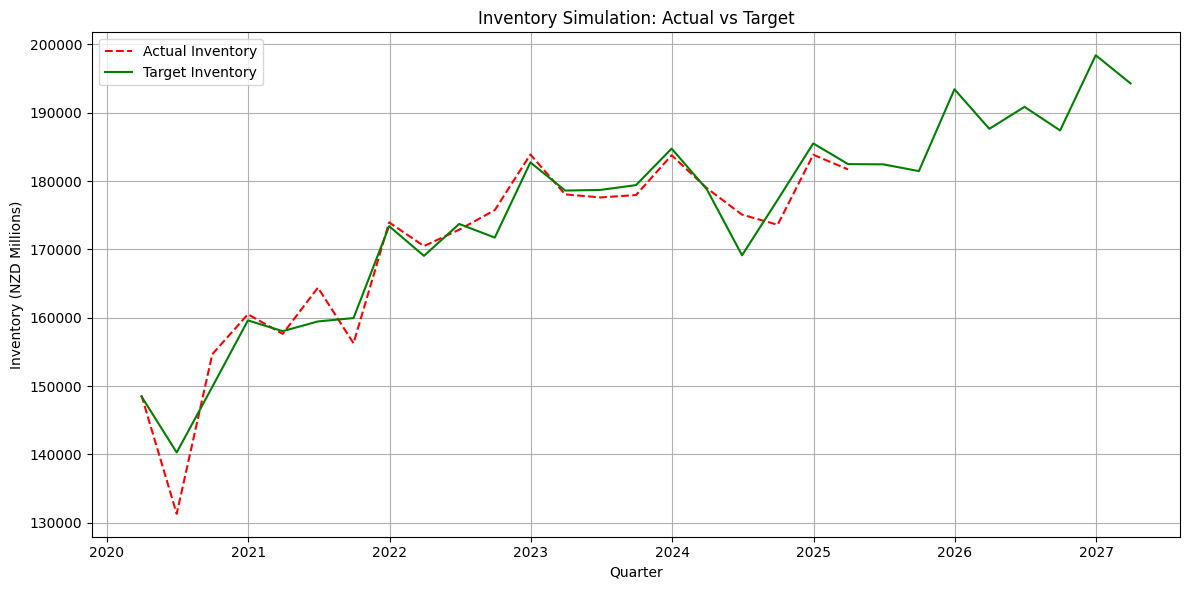

In [11]:
# Create a combined dataframe with actual sales and forecast
df_combined = forecast[['ds', 'yhat']].copy()
df_combined = df_combined.rename(columns={'yhat': 'Target_Inventory'})

# Add the actual sales data
df_combined = df_combined.merge(sales_df.rename(columns={'y': 'Actual_Inventory'}), on='ds', how='left')

# Calculate unit cost and holding cost
df_combined['Unit_Cost'] = unit_cost
df_combined['Holding_Cost'] = df_combined['Actual_Inventory'] * unit_cost * 0.02

# 📊 Plot inventory actual vs target
plt.figure(figsize=(12,6))
sns.lineplot(data=df_combined, x='ds', y='Actual_Inventory', label='Actual Inventory', linestyle='--', color='red')
sns.lineplot(data=df_combined, x='ds', y='Target_Inventory', label='Target Inventory', color='green')
plt.title("Inventory Simulation: Actual vs Target")
plt.xlabel("Quarter")
plt.ylabel("Inventory (NZD Millions)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

In [12]:
# ✅Export final dataset
df_combined.to_csv("supplychain_enriched_2020_2027.csv", index=False)
# files.download("supplychain_enriched_2020_2027.csv")

| Problem                                    | Solution                                                                 |
| ------------------------------------------ | ------------------------------------------------------------------------ |
| Excess inventory ties up working capital   | Simulated target inventory using forecasts, compared with actuals        |
| Poor alignment of supply with demand       | Prophet used to predict future demand per quarter                        |
| No insight into financial cost of holding  | Unit cost from AES + holding rate used to estimate actual \$ burden      |
| Lack of actionable KPI for supply planners | Dashboard-ready metrics: excess inventory, stockouts, forecast vs actual |
